In [1]:
try: 
  %tensorflow_version 2.x
  %reload_ext tensorboard
except:
  pass

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
path='/content/drive/MyDrive/ANN_Data/HW03/auto-mpg.csv'
data = pd.read_csv(path,na_values=['NA', '?'])
print(f"horsepower has na? {pd.isnull(data['horsepower']).values.any()}")

horsepower has na? True


In [13]:
for index, row in data.iterrows():
    for col in data.columns:
        if row[col]=='?':
          print(index,col)

In [14]:
med = data['horsepower'].median()
print(med)
data['horsepower'] = data['horsepower'].fillna(med)
print(f"horsepower has na? {pd.isnull(data['horsepower']).values.any()}")

93.5
horsepower has na? False


In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = data.drop(['mpg','car name'],axis=1).values   # independant features
y = data[['mpg']].values				# dependant variable

min_max_scaler_x = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler_x.fit_transform(X)
X = pd.DataFrame(x_scaled)

min_max_scaler_y = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler_y.fit_transform(y)
y = pd.DataFrame(y_scaled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4-1 : changing number of Layers**

In [48]:
def create_mlp_models(unit_nums=5,hidden_layers=3):
  
  model = keras.Sequential()
  model.add(layers.Input(shape=(7),name="Input_layer"))
  for i in range(hidden_layers):
    model.add(layers.Dense(units=unit_nums, activation="relu",name="hidden_layer" + str(i+1)))
  
  model.add(layers.Dense(units=1,name='output_layer'))
  return model


# model = keras.models.Sequential([
#                                 keras.Input(shape=(7)),
#                                 keras.layers.Dense(units=4,activation="relu",name="hidden_layer" + str(1)),
#                                 keras.layers.Dense(units=4,activation="relu",name="hidden_layer" + str(2)),
#                                 keras.layers.Dense(units=4,activation="relu",name="hidden_layer" + str(3)),
#                                 keras.layers.Dense(units=1,name='output_layer')
# ])
# keras.utils.plot_model(model)


In [49]:
layers_num = np.array([1,2,3,5,10,50,100])
models = []
unit_nums=20
for l in layers_num:
  model = create_mlp_models(unit_nums,l)  
  model.compile(optimizer="adam",loss=keras.losses.mse)
  models.append(model)

In [50]:
histories=[]
for model in models:
  history = model.fit(X_train,y_train,epochs=100, validation_split=0.125)
  print("*"*100)
  histories.append(history)

Epoch 1/100
9/9 [==============================] - 0s 17ms/step - loss: 0.4894 - val_loss: 0.4253
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3681 - val_loss: 0.3233
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2732 - val_loss: 0.2433
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2008 - val_loss: 0.1806
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1436 - val_loss: 0.1333
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1015 - val_loss: 0.0976
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0719 - val_loss: 0.0725
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0524 - val_loss: 0.0572
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0419 - val_loss: 0.0490
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0372 - val_loss: 0.0446
Epoch 11/100
9/9 [==========

In [51]:
for model in models:
  model.evaluate(X_test,y_test)
  print("*"*50)

3/3 [==============================] - 0s 4ms/step - loss: 0.0053
**************************************************
3/3 [==============================] - 0s 3ms/step - loss: 0.0044
**************************************************
3/3 [==============================] - 0s 3ms/step - loss: 0.0038
**************************************************
3/3 [==============================] - 0s 2ms/step - loss: 0.0040
**************************************************
3/3 [==============================] - 0s 5ms/step - loss: 0.0047
**************************************************
3/3 [==============================] - 0s 4ms/step - loss: 0.0047
**************************************************
3/3 [==============================] - 0s 5ms/step - loss: 0.0389
**************************************************


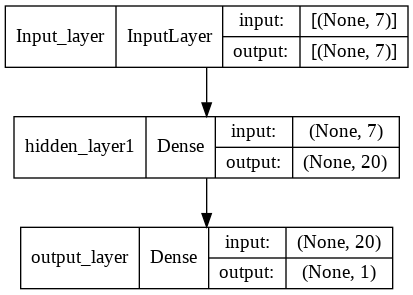

In [53]:
keras.utils.plot_model(models[0],show_shapes=True,show_layer_names=True)

In [57]:
models[1].summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 20)                160       
                                                                 
 hidden_layer2 (Dense)       (None, 20)                420       
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


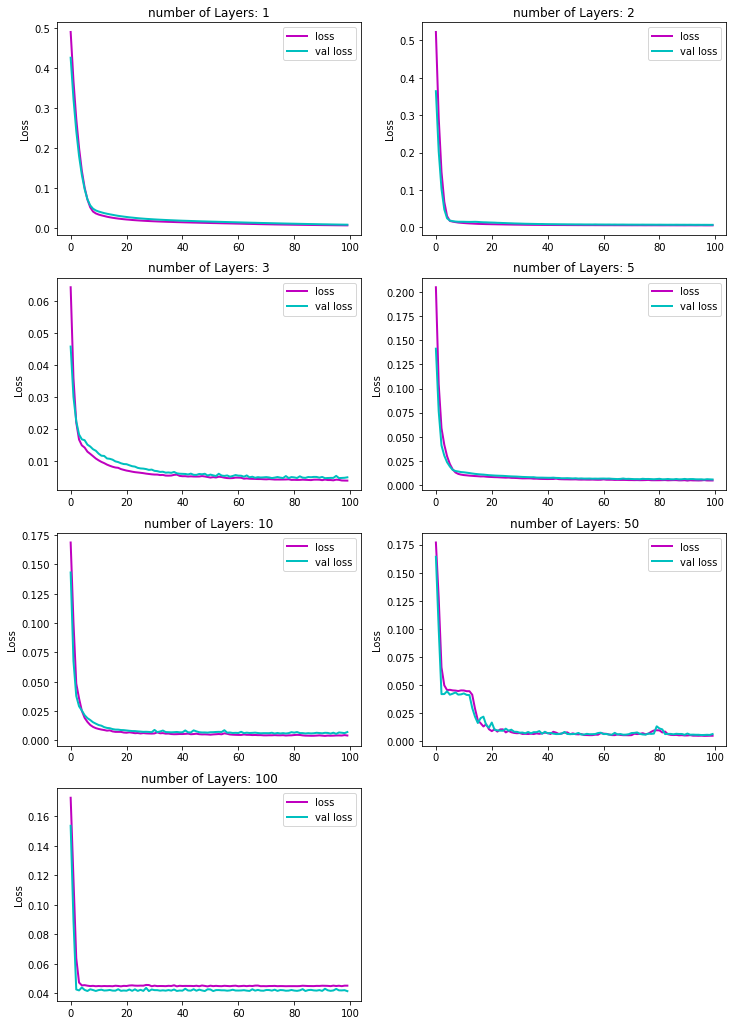

In [55]:
plt.figure(figsize=(12,18))
for i,history in enumerate(histories):
  plt.subplot(4, 2, i+1)
  plt.plot(history.history['loss'], label = 'loss',c="m",linewidth=2)
  plt.plot(history.history['val_loss'], label='val loss',c="c",linewidth=2)
  # plt.grid(True)
  plt.title("number of Layers: "+str(layers_num[i]))
  plt.ylabel("Loss")
  plt.legend()
plt.savefig("part_4_1")

In [ ]:
for i in range(5):
  prediction = models[i].predict(X_test)
  print(prediction)
  print("*"*50)

In [ ]:
models[6].predict(X_test)

# **4-2: changing number of neurons**

In [99]:
n = 150
model = keras.models.Sequential([
                                keras.Input(shape=(7)),
                                keras.layers.Dense(units=n,activation="relu",name="hidden_layer" + str(1)),
                                keras.layers.Dense(units=n,activation="relu",name="hidden_layer" + str(2)),
                                keras.layers.Dense(units=n,activation="relu",name="hidden_layer" + str(3)),
                                keras.layers.Dense(units=1,name='output_layer')
])

In [100]:
model.compile(optimizer="adam",loss=keras.losses.mse)

In [101]:
history = model.fit(X_train,y_train,epochs=100, validation_split=0.125)

Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0910 - val_loss: 0.0317
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0213 - val_loss: 0.0227
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0142 - val_loss: 0.0142
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0116 - val_loss: 0.0124
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.0118
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0097
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.0087
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0071 - val_loss: 0.0084
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0064 - val_loss: 0.0085
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0077
Epoch 11/100
9/9 [==========

In [102]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.0050


0.0050319186411798

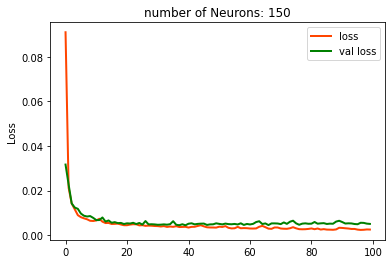

In [103]:
# plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label = 'loss',c="orangered",linewidth=2)
plt.plot(history.history['val_loss'], label='val loss',c="g",linewidth=2)
plt.title("number of Neurons: "+str(n))
plt.ylabel("Loss")
plt.legend()
# plt.savefig("part_4_2")

In [68]:
neurons_num = np.array([5,10,50,100,150])
neuro_models = []
layer_nums=3
for n in neurons_num:
  model = create_mlp_models(layer_nums,n)  
  model.compile(optimizer="adam",loss=keras.losses.mse)
  neuro_models.append(model)

In [69]:
neuro_histories=[]
for model in neuro_models:
  history = model.fit(X_train,y_train,epochs=100, validation_split=0.125)
  print("*"*100)
  neuro_histories.append(history)

Epoch 1/100
9/9 [==============================] - 1s 18ms/step - loss: 0.1904 - val_loss: 0.2013
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1836 - val_loss: 0.1943
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1771 - val_loss: 0.1874
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1707 - val_loss: 0.1807
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1646 - val_loss: 0.1743
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1587 - val_loss: 0.1681
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1530 - val_loss: 0.1621
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1474 - val_loss: 0.1564
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1424 - val_loss: 0.1508
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1372 - val_loss: 0.1456
Epoch 11/100
9/9 [==========

In [70]:
for model in neuro_models:
  model.evaluate(X_test,y_test)
  print("*"*50)

3/3 [==============================] - 0s 3ms/step - loss: 0.0381
**************************************************
3/3 [==============================] - 0s 3ms/step - loss: 0.0381
**************************************************
3/3 [==============================] - 0s 3ms/step - loss: 0.0381
**************************************************
3/3 [==============================] - 0s 4ms/step - loss: 0.0381
**************************************************
3/3 [==============================] - 0s 5ms/step - loss: 0.0381
**************************************************


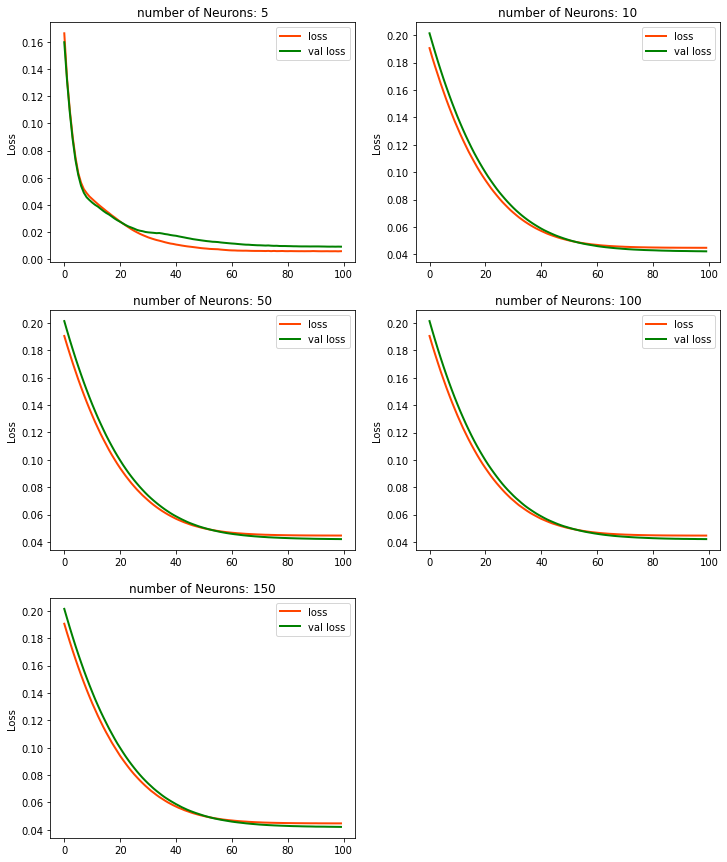

In [61]:
plt.figure(figsize=(12,15))
for i,history in enumerate(neuro_histories):
  plt.subplot(3, 2, i+1)
  plt.plot(history.history['loss'], label = 'loss',c="orangered",linewidth=2)
  plt.plot(history.history['val_loss'], label='val loss',c="g",linewidth=2)
  # plt.grid(True)
  plt.title("number of Neurons: "+str(neurons_num[i]))
  plt.ylabel("Loss")
  plt.legend()
plt.savefig("part_4_2")

In [ ]:
for i in range(5):
  prediction = neuro_models[i].predict(X_test)
  print(prediction)
  print("*"*50)

# **4-3: changing learning rate**

In [123]:
learning_rates=[0.0001,0.001,0.01,0.1,0.9,1]
unit_nums=50
hidden_layers=3
lr_models=[]
for lr in learning_rates:
  model = create_mlp_models(unit_nums=unit_nums,hidden_layers=hidden_layers)
  model.compile(optimizer= keras.optimizers.Adam(learning_rate=lr),loss=keras.losses.mse)
  lr_models.append(model)


In [124]:
lr_histories=[]
for model in lr_models:
  history = model.fit(X_train,y_train,epochs=100, validation_split=0.125)
  print("*"*100)
  lr_histories.append(history)

Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 0.1849 - val_loss: 0.1907
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1682 - val_loss: 0.1745
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1524 - val_loss: 0.1596
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1382 - val_loss: 0.1453
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1242 - val_loss: 0.1319
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1115 - val_loss: 0.1190
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0996 - val_loss: 0.1067
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0883 - val_loss: 0.0956
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0782 - val_loss: 0.0856
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0690 - val_loss: 0.0768
Epoch 11/100
9/9 [==========

In [125]:
for model in lr_models:
  model.evaluate(X_test,y_test)
  print("*"*50)

3/3 [==============================] - 0s 3ms/step - loss: 0.0058
**************************************************
3/3 [==============================] - 0s 3ms/step - loss: 0.0050
**************************************************
3/3 [==============================] - 0s 3ms/step - loss: 0.0044
**************************************************
3/3 [==============================] - 0s 3ms/step - loss: 0.0048
**************************************************
3/3 [==============================] - 0s 3ms/step - loss: 0.0381
**************************************************
3/3 [==============================] - 0s 2ms/step - loss: 1.7169
**************************************************


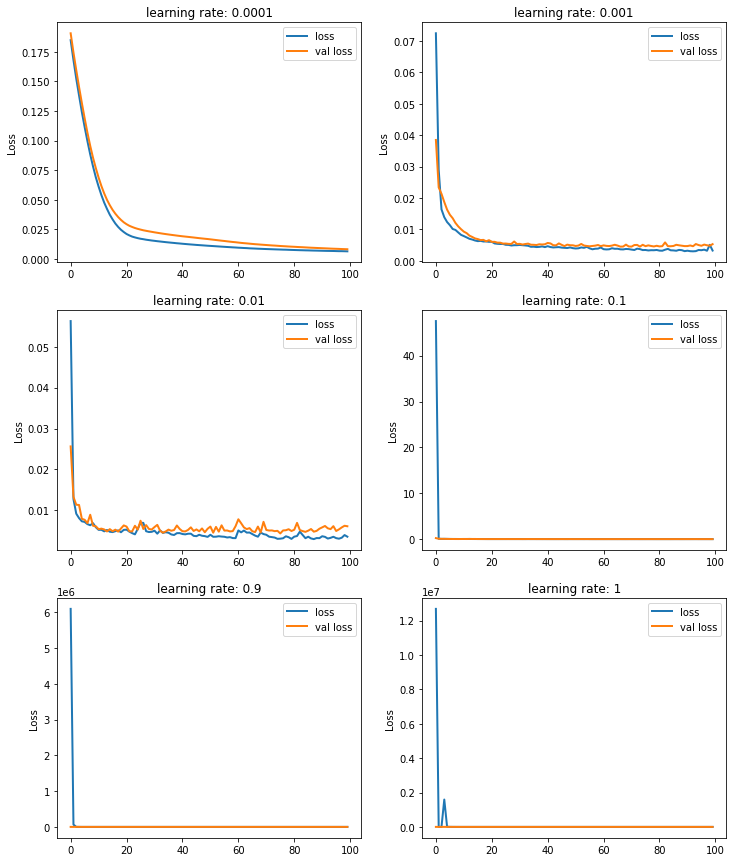

In [127]:
plt.figure(figsize=(12,15))
for i,history in enumerate(lr_histories):
  plt.subplot(3, 2, i+1)
  plt.plot(history.history['loss'], label = 'loss',linewidth=2)
  plt.plot(history.history['val_loss'], label='val loss',linewidth=2)
  # plt.grid(True)
  plt.title("learning rate: "+str(learning_rates[i]))
  plt.ylabel("Loss")
  plt.legend()
plt.savefig("part_4_3")

# plotting best one

In [16]:
model = keras.models.Sequential([
                                keras.Input(shape=(7)),
                                keras.layers.Dense(units=50,activation="relu",name="hidden_layer" + str(1)),
                                keras.layers.Dense(units=50,activation="relu",name="hidden_layer" + str(2)),
                                keras.layers.Dense(units=50,activation="relu",name="hidden_layer" + str(3)),
                                keras.layers.Dense(units=1,name='output_layer')
])

In [17]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.01),loss=keras.losses.mse)

In [18]:
history = model.fit(X_train,y_train,epochs=100, validation_split=0.125)

Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 0.0418 - val_loss: 0.0130
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0096 - val_loss: 0.0087
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.0119
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0086 - val_loss: 0.0079
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0062
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.0104
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0076 - val_loss: 0.0089
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0070
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0081
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0076 - val_loss: 0.0060
Epoch 11/100
9/9 [==========

In [19]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.0048


0.004774642176926136

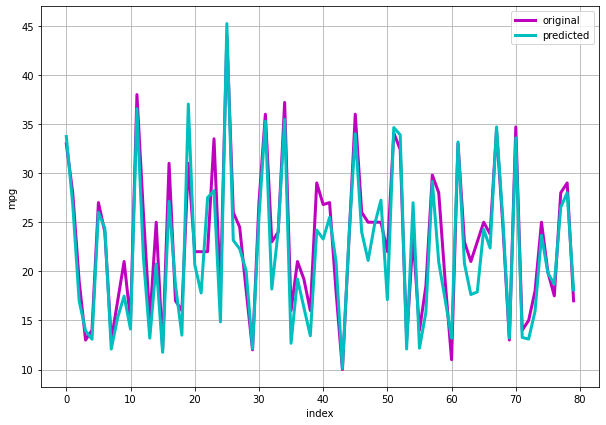

In [45]:
normalized_pred = model.predict(X_test)
pred = min_max_scaler_y.inverse_transform(normalized_pred)

y_test_original = min_max_scaler_y.inverse_transform(y_test)
plt.figure(figsize=(10,7))
plt.plot(y_test_original, label = 'original',c="m",linewidth=3)
plt.plot(pred, label='predicted',c="c",linewidth=3)
plt.xlabel('index')
plt.ylabel('mpg')
plt.grid(True)
plt.legend()